In [1]:
import torch
import numpy as np

from data import Task1Data
from torch.utils.data.dataloader import DataLoader
from sklearn import preprocessing

from models.mine_cvq import VQVAE
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

train_dataset = Task1Data(is_train=True,is_test=False)
val_dataset = Task1Data(is_train=False,is_test=False)
test_dataset = Task1Data(is_train=False,is_test=True)

Finding Training files: 863
Finding Validation files: 186
0/1: 114/72
Finding Testing files: 185
0/1: 101/84


In [2]:
train_dataset = Task1Data(is_train=True,is_test=False)
val_dataset = Task1Data(is_train=False,is_test=False)
test_dataset = Task1Data(is_train=False,is_test=True)

train_loader = DataLoader(train_dataset, batch_size=32,num_workers=0)
val_loader = DataLoader(val_dataset, batch_size=32,num_workers=0)
test_loader = DataLoader(test_dataset, batch_size=32,num_workers=0)

Finding Training files: 863
Finding Validation files: 186
0/1: 114/72
Finding Testing files: 185
0/1: 101/84


In [3]:
model = VQVAE(input_dim = 100, hidden_dim = 512, state_num_embeddings = 512, transition_num_embeddings = 16, embedding_dim = 256, commitment_cost = 0.1,model = 'mamba') # 


In [8]:
checkpoint = torch.load("checkpoint/checkpoint_cvqvae_mamba_con/model_10000.pth", map_location='cpu')
model.load_state_dict(checkpoint['model'])
model.eval().cuda()
print()

In [9]:
test,_ = next(iter(test_loader))

In [16]:
gt = test[0][None].float().cuda()
pred,_,_ = model(gt)

In [17]:
import matplotlib.pyplot as plt

In [18]:
from scipy.stats import pearsonr

(-3.0, 3.0)

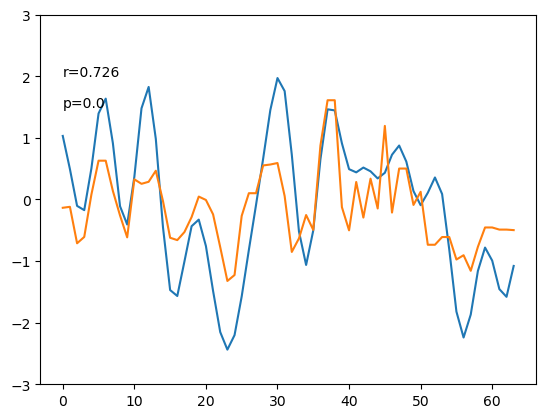

In [22]:
roi = 0

gt_numpy = gt[0,:,roi].detach().cpu().numpy()
pred_numpy = pred[0,:,roi].detach().cpu().numpy()

plt.plot(range(64), gt_numpy)
plt.plot(range(64), pred_numpy)
r,pval = pearsonr(pred_numpy, gt_numpy)

plt.text(0,2,f'r={np.round(r,3)}')
plt.text(0,1.5,f'p={np.round(pval,3)}')
plt.ylim([-3,3])

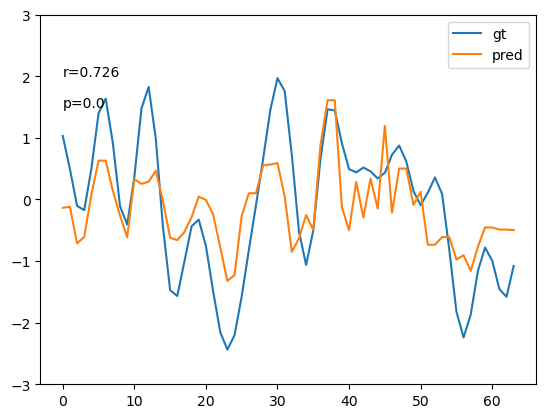

In [23]:
roi = 0

gt_numpy = gt[0,:,roi].detach().cpu().numpy()
pred_numpy = pred[0,:,roi].detach().cpu().numpy()

plt.plot(range(64), gt_numpy,label='gt')
plt.plot(range(64), pred_numpy,label='pred')
r,pval = pearsonr(pred_numpy, gt_numpy)

plt.text(0,2,f'r={np.round(r,3)}')
plt.text(0,1.5,f'p={np.round(pval,3)}')
plt.ylim([-3,3])
plt.legend()

(-3.0, 3.0)

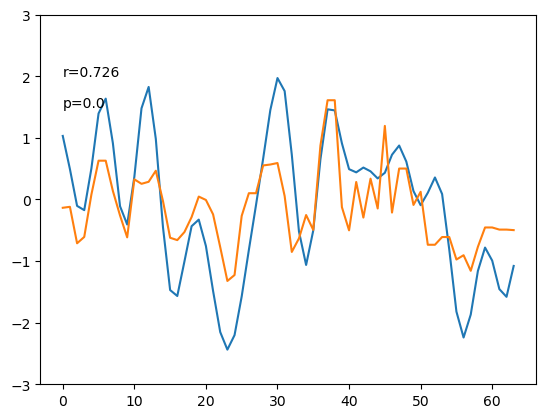

In [24]:
roi = 0

gt_numpy = gt[0,:,roi].detach().cpu().numpy()
pred_numpy = pred[0,:,roi].detach().cpu().numpy()

plt.plot(range(64), gt_numpy)
plt.plot(range(64), pred_numpy)
r,pval = pearsonr(pred_numpy, gt_numpy)

plt.text(0,2,f'r={np.round(r,3)}')
plt.text(0,1.5,f'p={np.round(pval,3)}')
plt.ylim([-3,3])

In [13]:
pval

2.6779621e-22

In [48]:
import pandas as pd

In [51]:
df = pd.read_csv("./data/use_adhd.csv")

In [52]:
df

,index,file,id,age,sex,dx,site,new_name,old_name,is_train,new_dx
0,0,sub-0016060_ses-1_task-rest_run-1_acq-1_space-...,16060,17.16,1.0,0,7,adhd_00000,16060,1,0
1,1,sub-0010026_ses-1_task-rest_run-1_space-templa...,10026,11.73,1.0,1,5,adhd_00001,10026,0,1
2,2,sub-1043241_ses-1_task-rest_run-1_acq-1_space-...,1043241,9.12,1.0,0,3,adhd_00002,1043241,0,0
3,3,sub-3470141_ses-1_task-rest_run-2_space-templa...,3470141,8.50,1.0,1,6,adhd_00003,3470141,0,1
4,4,sub-1780174_ses-1_task-rest_run-1_space-templa...,1780174,11.18,1.0,1,5,adhd_00004,1780174,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1229,1255,sub-0010058_ses-1_task-rest_run-1_space-templa...,10058,14.20,1.0,0,5,adhd_01255,10058,1,0
1230,1256,sub-0016037_ses-1_task-rest_run-1_acq-1_space-...,16037,14.15,1.0,0,7,adhd_01256,16037,1,0
1231,1257,sub-1679142_ses-1_task-rest_run-2_space-templa...,1679142,10.33,1.0,0,6,adhd_01257,1679142,0,0
1232,1258,sub-1023964_ses-1_task-rest_run-2_space-templa...,1023964,8.29,1.0,3,5,adhd_01258,1023964,1,1
